In [1]:

import numpy as np
import pandas as pd


In [2]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/content/IMDB Dataset.csv'

# Read the CSV file with on_bad_lines parameter
df = pd.read_csv(csv_file_path, on_bad_lines='skip')

# Display the DataFrame
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/IMDB Dataset.csv'

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
# Replace 'dataset.csv' with the path to your dataset file
#df = pd.read_csv('dataset.csv')

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into text
    processed_text = ' '.join(filtered_tokens)

    return processed_text

# Apply preprocessing to 'review' column
df['clean_review'] = df['review'].apply(preprocess_text)

# Display the original and preprocessed text
print("Original Text:\n", df['review'].iloc[0])
print("\nCleaned and Preprocessed Text:\n", df['clean_review'].iloc[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original Text:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show i

Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        50000 non-null  object
 1   sentiment     50000 non-null  object
 2   clean_review  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB
None

Distribution of Sentiments:
positive    25000
negative    25000
Name: sentiment, dtype: int64


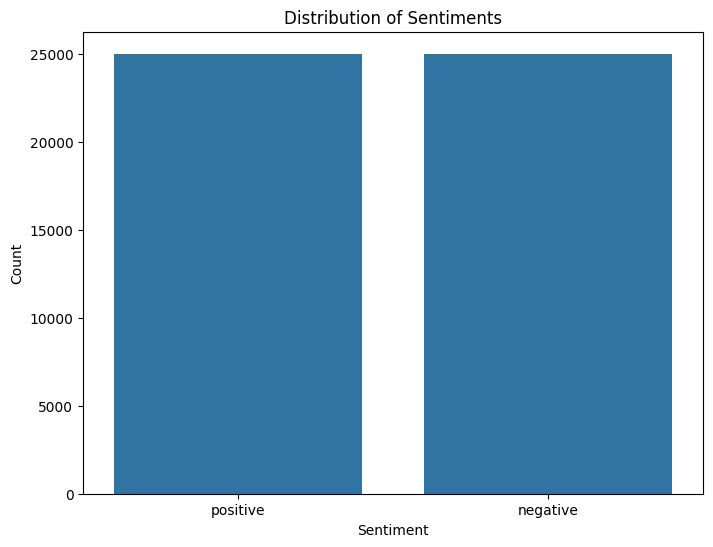


Top 10 Most Common Words or Phrases:
[(' ', 11507297), ('e', 6036511), ('t', 4565527), ('a', 3979283), ('o', 3754514), ('i', 3654084), ('s', 3342252), ('n', 3321375), ('r', 3003149), ('h', 2701649)]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Explore dataset structure
print("Dataset Structure:")
print(df.info())

# Distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()
print("\nDistribution of Sentiments:")
print(sentiment_counts)

# Visualize distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Common words or phrases used in reviews
all_tokens = [token for tokens in df['review'] for token in tokens]
word_freq = Counter(all_tokens).most_common(10)
print("\nTop 10 Most Common Words or Phrases:")
print(word_freq)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample dataset of movie reviews (replace with your actual dataset)


# Initialize CountVectorizer for Bag-of-Words representation
count_vectorizer = CountVectorizer(max_features=1500)

# Fit and transform the data using CountVectorizer
bow_matrix = count_vectorizer.fit_transform(df).toarray()




In [ ]:
bow_matrix

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Assuming you have your data stored in X (features) and y (labels)
# X should be a list/array of text documents, and y should be the corresponding labels
X=df['review']
y=df['sentiment']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into a matrix of token counts
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Predict labels for the test set
y_pred = clf.predict(X_test_counts)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8488


In [ ]:
import joblib
joblib.dump(clf,'model_joblib_sentiment.pkl')

['model_joblib_sentiment.pkl']

In [ ]:
# Load the model
clf = joblib.load('model_joblib_sentiment.pkl')
new_data = ["welcome back to my chammels i am not your pain."]

# Now, suppose you have new data in variable 'new_data' that you want to predict
new_data_counts = vectorizer.transform(new_data)  # Transform the new data using the same vectorizer used for training

# Predict the labels for the new data
new_data_pred = clf.predict(new_data_counts)

# Print the predictions
print("Predictions:", new_data_pred)

Predictions: ['negative']
